# Radar Equation - Maximum Range For Target Calculation   

radar range equation represents the physical dependences of the transmit power, which is the wave propagation up to the receiving of the echo signals:

### \\( SNR = \frac{P_{t}G_{t}G_{r}\lambda^2\sigma}{(4\pi)^3R^4kT_{s}B_{n}F_{sys}} \\)

| Parameter | Description | Units | 
| --------- | ----------- |------ |
| \\( P_{t} \\) | Power transmitted | dBm |
| \\( G_{t} \\) | Gain transceiver | dBi | 
| \\( G_{r} \\) | Gain transceiver | dBi |
| \\( \lambda \\) | wavelength | m |
| \\( \alpha \\) | target RCS | dBsm | 
| \\( R \\) | Range to target | m | 
| \\( k \\) | Boltzmann constant | jouls/degK |
| \\( T_{s} \\) | Noise temperature | K |
\\( B_{n} \\) | Noise bandwith (RF) | Hz | 
\\( F_{sys} \\) | Noise figure | dB | 
| RCS| Radar cross section |N/A |

When converting the formula to \\( log \\) form, we get the following equation (assuming units convention):

\\( SNR = P_{t}+G_{t}+G_{r}+20\log_{10}\lambda+10\log_{10}RCS-(30\log_{10}4\pi+40\log_{10}R+10\log_{10}k+10\log_{10}T_{s}+10\log_{10}B_{n}+F_{sys}) \\)


In [62]:
#Basic parameters 
import numpy as np
import pandas as pd 
from astropy.io import ascii
from ipywidgets import widgets

filename = 'typical_pattern_77GHz.txt'
data = ascii.read('typical_pattern_77GHz.txt', data_start=2) 

P_t = 12
Lambda = 0.00389
# 290 K
T_0 = 24.62
K = -228.601
F = 12+3
B = 10*1000000
RCS = 20
Bandwith = 10*1000000

## Proccesing Gain Calculation

Proccesing gain is defined as a coherent sum of power recieved per frame. Subject to waveform design:\
\\( P_{g} = 10\log_{10} (N_{s}N_{p}N_{c}) - P_{loss} \\) \
*Nc - Amount of channels goes through angular proccesing

In [63]:
P_g = 63 - 5

### Calculating antenna gain per angle 

In [64]:
x = np.ones( (359,2001))
range_table = np.arange(1,2001,1)
data1 = data['col1','col3']

for i in range(358):
    for j in range (2000):
        Pr = P_t + 2*data1[i][1] + RCS + 20*np.log10(Lambda) - ((30*np.log10(4*np.pi)) + 40*np.log10(range_table[j])) + P_g    
        Pn = K + T_0 + F + 30 + 10*np.log10(B) 
        x[i][j] = Pr-Pn

### Getting maximum range to target assuming SNR > 12

In [65]:
solution = np.ones( (359,2))

for i in range(359):
    for j in range(2000):
        t = x[i][j]
        if t > 12:
            solution[i][0] = i-180
            solution[i][1] = j
        else:
            t = 0

## FOV data visualization

In [66]:
import plotly.graph_objects as go

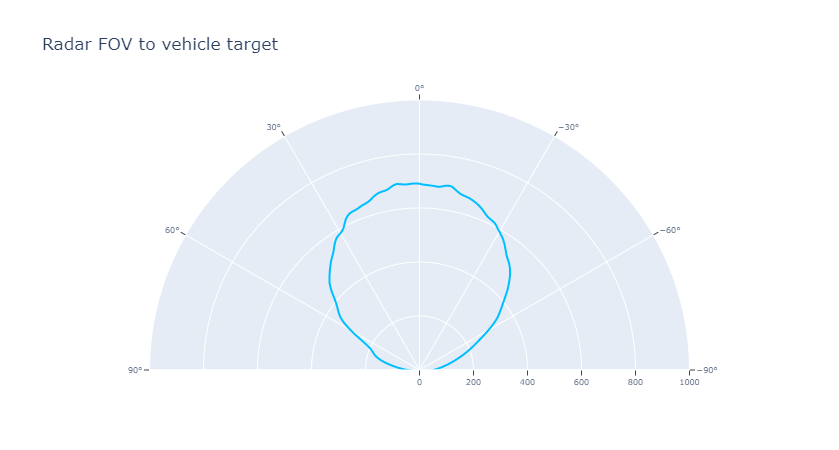

In [67]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
        r = solution[:,1],
        theta = solution[:,0],
        mode = 'lines',
        name = 'Figure 8',
        line_color = 'deepskyblue',
    ))

fig.update_layout(
    title = 'Radar FOV to vehicle target',
    showlegend = False,
    polar = dict(
        radialaxis = dict(range=[0, 1000], tickfont_size=8, ticks='outside'),
        angularaxis = dict(showticklabels=True,tickfont_size=8, rotation=90, ticks='outside'),
        sector = [0,180]
    )
)

Some debug:

In [68]:
degree = data1[150][0]
Pr = P_t + 2*data1[150][1] + 10*np.log10(RCS) + 20*np.log10(Lambda) - ((30*np.log10(4*np.pi)) + 40*np.log10(1344)) + P_g
Pn = K + T_0 + 11 + 10*np.log10(B)
SNR = Pr-Pn

In [69]:
degree

-30.0

In [70]:
SNR

24.798025313778822

# Range Resolution

Range resolution is defined as using the following formula:

$\ \delta{R} = \frac{c}{2B} $

In [71]:
range_resolution = 299792458/(2*B)

In [72]:
range_resolution

14.9896229

# Range Accuracy

Range accuracy is a function of range resolution and SNR, defined by the following formula:

$\ = \frac{\delta{R}}{\sqrt{2*SNR}} $

In [73]:
Pn = K + T_0 + 30 + 10*np.log10(B)

In [74]:
Pn

-103.981